In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


In [2]:
import os

BASE_DATA_DIR = 'h_dir'
TRAIN_DIR = os.path.join(BASE_DATA_DIR,'train')
TEST_DIR = os.path.join(BASE_DATA_DIR,'test')

print(TRAIN_DIR)
print(TEST_DIR)

h_dir\train
h_dir\test


In [3]:
#checking if the image data is not corrupted, again
from PIL import Image

def check_corrupted_file(directory):
    for item in os.listdir(directory):
        path = os.path.join(directory,item)
        try:
            check_corrupted_file(path)
        except:
            try:
                Image.open(path)
            except:
                print("found more corrupted data")
                pass
            pass

In [4]:
check_corrupted_file(BASE_DATA_DIR)

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (210, 150),
    batch_size = 24,
    class_mode = 'binary'
)

val_datagen = ImageDataGenerator(rescale=1.255)

val_generator = val_datagen.flow_from_directory(
    TEST_DIR,
    target_size = (210, 150),
    batch_size = 24,
    class_mode = 'binary'
)

Found 12274 images belonging to 2 classes.
Found 1365 images belonging to 2 classes.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 208, 148, 4)       112       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 104, 74, 4)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 102, 72, 8)        296       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 51, 36, 8)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 49, 34, 16)        1168      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 24, 17, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6528)             

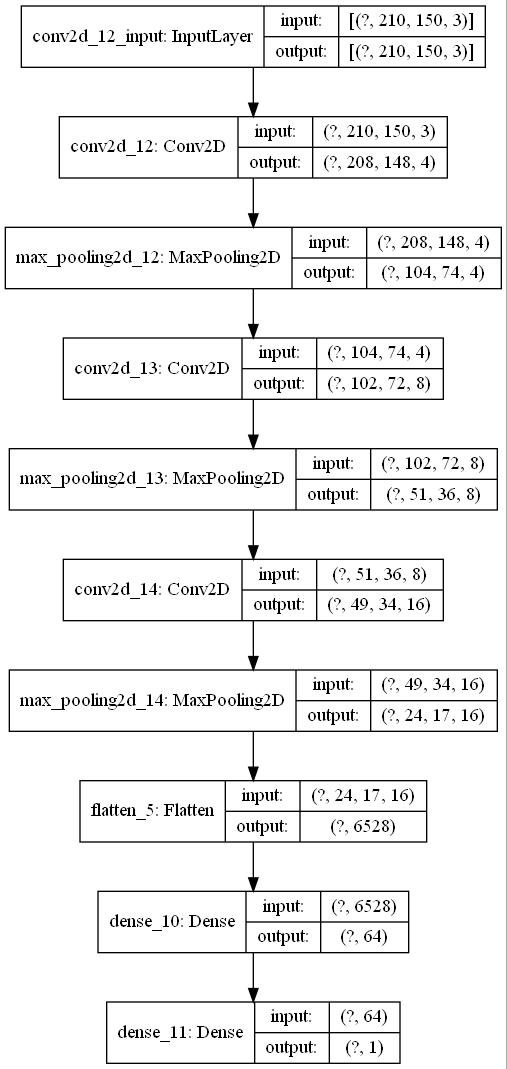

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(4, (3,3), activation='relu', input_shape=(210, 150, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

dot_img_file = 'model_1.jpg'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [14]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
    train_generator,
    epochs = 20,
    verbose = 1,
    validation_data = val_generator
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 512 steps, validate for 57 steps
Epoch 1/20
512/512 [==============================] - 205s 400ms/step - loss: 0.3737 - accuracy: 0.8847 - val_loss: 0.6235 - val_accuracy: 0.7788
Epoch 2/20
512/512 [==============================] - 188s 367ms/step - loss: 0.3612 - accuracy: 0.8849 - val_loss: 23.5220 - val_accuracy: 0.8813
Epoch 3/20
512/512 [==============================] - 245s 479ms/step - loss: 0.3573 - accuracy: 0.8849 - val_loss: 3.8906 - val_accuracy: 0.8835
Epoch 4/20
512/512 [==============================] - 223s 436ms/step - loss: 0.3581 - accuracy: 0.8849 - val_loss: 4.3938 - val_accuracy: 0.8835
Epoch 5/20
512/512 [==============================] - 194s 379ms/step - loss: 0.3580 - accuracy: 0.8849 - val_loss: 4.3937 - val_accuracy: 0.8842
Epoch 6/20
512/512 [==============================] - 225s 440ms/step - loss: 0.3580 - accuracy: 0.8849 - val_loss: 4.1091 - val_accuracy: 0.8842
Epoch 7/20
512/512 [==========

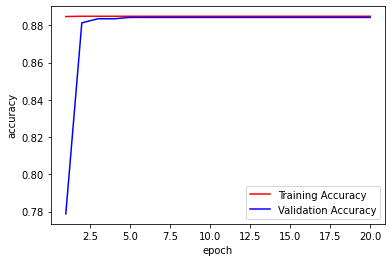

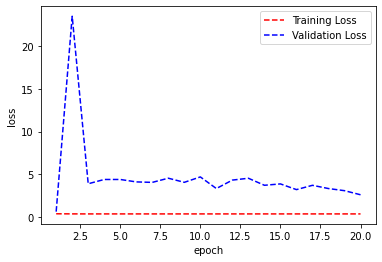

In [19]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epoch = range(1, len(train_acc)+1)
plt.figure(1)
plt.plot(epoch, train_acc, 'r-')
plt.plot(epoch, val_acc, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.figure(2)
plt.plot(epoch, train_loss, 'r--')
plt.plot(epoch, val_loss, 'b--')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [21]:
model.save('h_distinguisher.h5')

In [22]:
model.save('h_distinguisher')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: h_distinguisher\assets
